In [1]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_histogram

In [58]:
n = 6 # number of qubits used to represent s
s = '111001'   # the hidden binary string

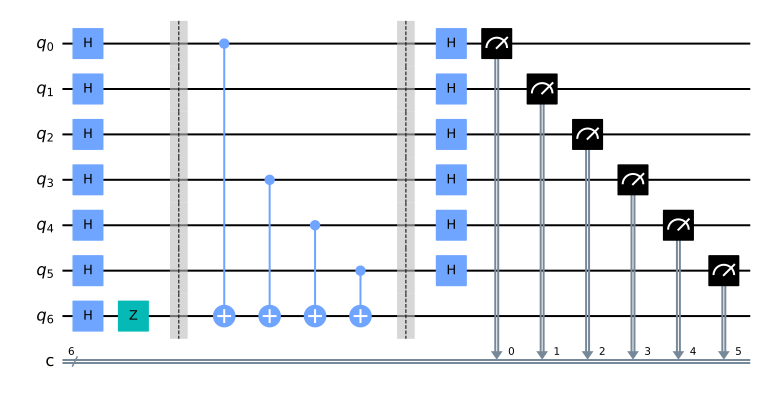

In [59]:
bv_circuit = QuantumCircuit(n+1, n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)
    
bv_circuit.barrier()

s = s[::-1] # s = 110
for q in range(n):
    if s[q] == '1':
        bv_circuit.cx(q, n)
        
bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

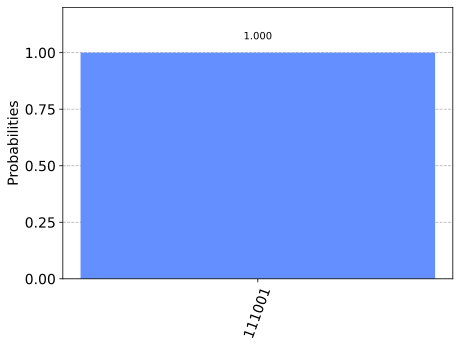

In [60]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [61]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: 
                                   x.configuration().n_qubits >= 7 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-07-21 02:57:12,385: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_oslo


In [62]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(bv_circuit, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


In [66]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)
print(answer)

{'000000': 31, '000001': 34, '010000': 8, '010001': 67, '010010': 11, '010011': 27, '010101': 6, '010110': 6, '010111': 19, '011000': 13, '011001': 48, '011010': 6, '011011': 12, '011100': 1, '011101': 11, '011110': 2, '011111': 12, '000010': 10, '100000': 21, '100001': 34, '100010': 12, '100011': 15, '100100': 4, '100110': 7, '100111': 16, '101000': 21, '101001': 23, '101010': 17, '101011': 10, '101100': 2, '101101': 9, '101110': 12, '101111': 14, '000011': 25, '110000': 13, '110001': 38, '110010': 14, '110011': 37, '110100': 4, '110101': 10, '110110': 9, '110111': 25, '111000': 22, '111001': 69, '111010': 8, '111011': 18, '111100': 1, '111101': 7, '111110': 15, '111111': 24, '000100': 3, '000101': 6, '000110': 7, '000111': 8, '001000': 30, '001001': 28, '001010': 18, '001011': 11, '001100': 6, '001101': 4, '001110': 5, '001111': 18}
